In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from nltk import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huzaifkherani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-01-03 16:05:24.594643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read the data
data = pd.read_csv('/Users/huzaifkherani/Desktop/untitled_folder_2/Detecting spam in email  with LSTM/combined_data.csv')

In [3]:
data.head(5)
# '1' indicates that the email is classified as spam.
# '0' denotes that the email is legitimate (ham).

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
# Check for null values
data.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
# Check the shape of the dataset
data.shape

(83448, 2)

In [6]:
data.label.value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [7]:
# Convert to lower case
data['text'] = data['text'].str.lower()

In [8]:
# Remove numbers and special characters
data['text'] = data['text'].str.replace('[^a-zA-Z]', ' ')

In [9]:
# Remove stop words
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [10]:
# Tokenize the data
data['text'] = data['text'].apply(word_tokenize)

In [11]:
data.head(5)

,label,text
0,1,"[ounce, feather, bowl, hummingbird, opec, mome..."
1,1,"[wulvob, get, medircations, online, qnb, ikud,..."
2,0,"[computer, connection, cnn, com, wednesday, es..."
3,1,"[university, degree, obtain, prosperous, futur..."
4,0,"[thanks, answers, guys, know, checked, rsync, ..."


In [12]:
# Rejoin the words for EDA
data['text'] = data['text'].apply(lambda x: ' '.join(x))

In [13]:
data.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection cnn com wednesday escapenu...
3,1,university degree obtain prosperous future mon...
4,0,thanks answers guys know checked rsync manual ...


In [14]:
for i in range (1,3):
    print("Email #"+str(i))
    spam_email = data[data['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
wulvob get medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt ever stopped wonder much average man pays mediecines ap painkillers drugs improve quality life weight reducing tablets many escapenumber what 's worse mediucine costs lot branded rfwur intrested http dmvrwm remunerativ net dfuaeirxygiq visit website escapenumber

Email #2
university degree obtain prosperous future money earning power prestige comes career position youve always dreamed diploma prestigious non accredited unversities based present knowledge professional experience qualify required tests classes books examinations c

In [15]:
for i in range (1,3):
    print("Email #"+str(i))
    legitimate_email = data[data['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
thanks answers guys know checked rsync manual would rather get escapenumber sure answer one current script bin bash rsync avt \\ exclude alpha \\ exclude arm \\ exclude hppa \\ exclude hurd \\ exclude iaescapenumber \\ exclude mescapenumberk \\ exclude mips \\ exclude mipsel \\ exclude multi arch \\ exclude powerpc \\ exclude sescapenumber \\ exclude sh \\ exclude sparc \\ exclude source \\ ftp de debian org debian cd var www mirror debian cd know loads excludes include distros soon rsync manual del alias delete delete delete extraneous files dest dirs delete receiver deletes transfer default delete receiver deletes xfer delete receiver deletes transfer delete excluded also delete excluded files dest dirs delete would suggest use thanks john escapelong escapenumber escapenumber escapenumber olleg samoylov wrote jonathan escapelong wrote sorry banal question favourite keys escapenumber stage rsync rsync verbose recursive links hard links times filter ' r tmp ' delete delay upda

## EDA

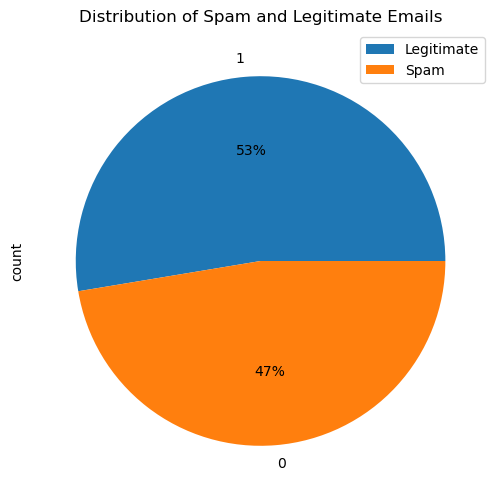

In [16]:
# Plot a pie chart to show the distribution of spam and legitimate emails
plt.figure(figsize=(6,6))
data['label'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Spam and Legitimate Emails')
plt.legend(["Legitimate", "Spam"])
plt.show()


(-0.5, 511.5, 511.5, -0.5)

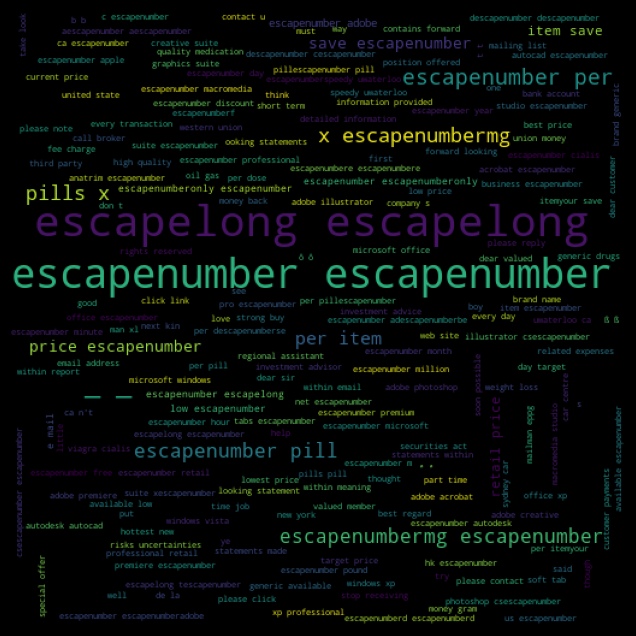

In [17]:
# Word Cloud for Spam Emails 
spam_words = ' '.join(list(data[data['label'] == 1]['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

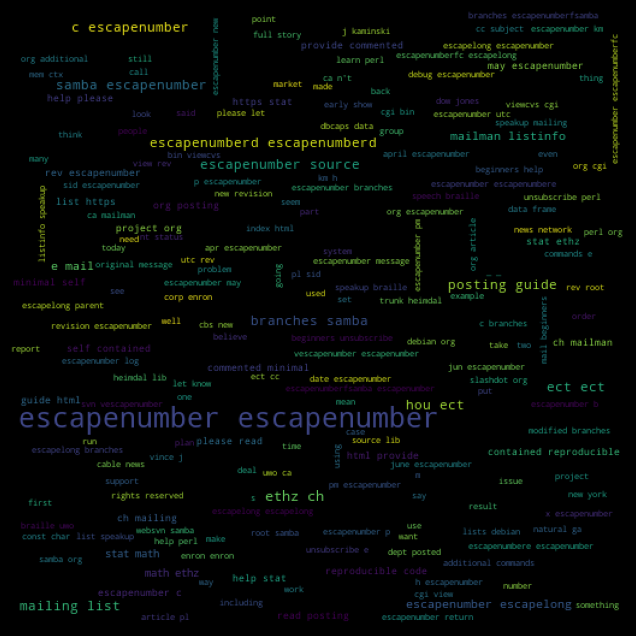

In [18]:
# Word cloud for Legitimate Emails
legitimate_words = ' '.join(list(data[data['label'] == 0]['text']))
legitimate_wc = WordCloud(width = 512,height = 512).generate(legitimate_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(legitimate_wc)
plt.axis('off')


In [19]:
# Separate the spam and legitimate emails
spam_emails = data[data['label'] == 1]['text']
legit_emails = data[data['label'] == 0]['text']

In [20]:
# Count word frequencies for spam
spam_words = Counter()
spam_emails.apply(lambda x: spam_words.update(x.split()))
spam_common = spam_words.most_common(10)
print(spam_common)

[('escapenumber', 333253), ('.', 196760), ('escapelong', 188114), (',', 126591), ('-', 80347), (':', 42349), ('_', 42324), ('/', 38523), ('?', 29869), ('com', 29014)]


In [21]:
# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))
legit_common = legit_words.most_common(10)
print(legit_common)


[('escapenumber', 798890), ('-', 292331), ('.', 255980), (',', 207749), ('/', 120002), (':', 104150), ("'", 80719), ('http', 54360), ('r', 53489), ('enron', 52858)]


In [22]:
# Convert to DataFrame
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

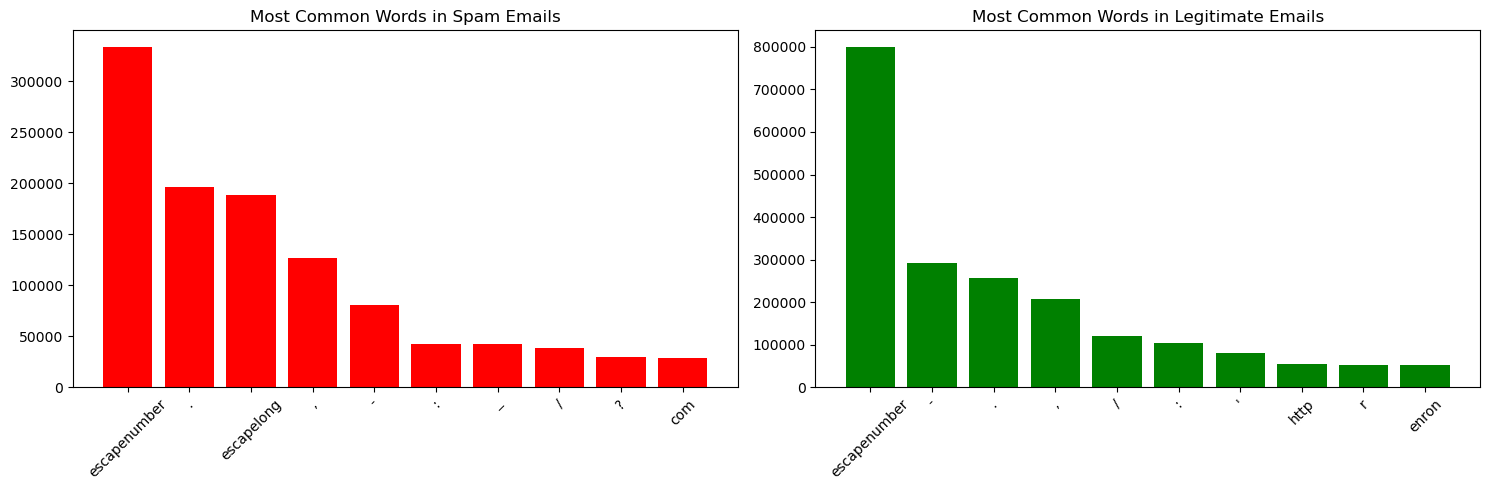

In [23]:
# Plotting the most common words in spam emails
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='red')
plt.title('Most Common Words in Spam Emails')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Legitimate Emails')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Function to generate ngrams
def generate_ngrams(text, n):
    words = word_tokenize(text)
    n_grams = ngrams(words, n)
    return [' '.join(grams) for grams in n_grams]

In [25]:
# Plot most common n grams for spam emails
spam_bigrams = Counter(generate_ngrams(str(spam_emails), 2))
spam_common_ngrams = spam_bigrams.most_common(10)
spam_common_ngrams_df = pd.DataFrame(spam_common_ngrams, columns=['Word', 'Frequency'])
print(spam_common_ngrams_df)

               Word  Frequency
0             w ...          2
1           0 ounce          1
2     ounce feather          1
3      feather bowl          1
4  bowl hummingbird          1
5  hummingbird opec          1
6       opec moment          1
7        moment ala          1
8           ala ...          1
9             ... 1          1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'w ...'),
  Text(1, 0, '0 ounce'),
  Text(2, 0, 'ounce feather'),
  Text(3, 0, 'feather bowl'),
  Text(4, 0, 'bowl hummingbird'),
  Text(5, 0, 'hummingbird opec'),
  Text(6, 0, 'opec moment'),
  Text(7, 0, 'moment ala'),
  Text(8, 0, 'ala ...'),
  Text(9, 0, '... 1')])

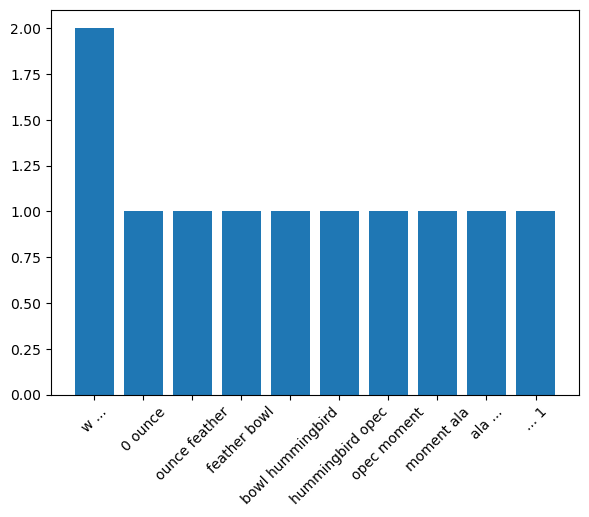

In [26]:
# Plot the spam_common_ngrams_df
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(spam_common_ngrams_df['Word'], spam_common_ngrams_df['Frequency'])
plt.xticks(rotation=45)


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3)

In [28]:
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [29]:
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection cnn com wednesday escapenu...
3,1,university degree obtain prosperous future mon...
4,0,thanks answers guys know checked rsync manual ...


In [30]:
#Average Length
average_length = data['text'].apply(len).mean()
print("Average Length: "+str(average_length))

Average Length: 1357.9127001246286


In [31]:
max_length = 1357

# Padding sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [32]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [33]:
# Create a pipeline with CountVectorizer and MultinomialNB
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f1_score = metrics.f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.96
F1 Score: 0.98


In [34]:
# Example new emails
new_emails = [
    "You've been selected for a special offer. Claim your reward today!",
    "Team meeting at 3 PM. Please be punctual and prepared.",
    "Limited-time discount on luxury watches. Explore our collection now!",
    "Urgent: Account verification required. Please update your information.",
    "Congratulations! You've won a free vacation. Click to redeem your prize.",
    "Reminder: Parent-Teacher meeting tomorrow at 6 PM in the school auditorium.",
    "Unlock exclusive access to premium content. Subscribe now for special benefits.",
    "Claim your bonus points! Shop with us and earn rewards on every purchase.",
    "Important announcement: Company-wide training session on Friday at 10 AM.",
    "Special offer for our valued customers. Get 20% off on your next purchase."
]

# Make predictions on new emails
predictions = model.predict(new_emails)

for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction == 1 else 'Not spam'}\n")

Email: You've been selected for a special offer. Claim your reward today!
Prediction: Spam

Email: Team meeting at 3 PM. Please be punctual and prepared.
Prediction: Spam

Email: Limited-time discount on luxury watches. Explore our collection now!
Prediction: Spam

Email: Urgent: Account verification required. Please update your information.
Prediction: Spam

Email: Congratulations! You've won a free vacation. Click to redeem your prize.
Prediction: Spam

Email: Reminder: Parent-Teacher meeting tomorrow at 6 PM in the school auditorium.
Prediction: Not spam

Email: Unlock exclusive access to premium content. Subscribe now for special benefits.
Prediction: Spam

Email: Claim your bonus points! Shop with us and earn rewards on every purchase.
Prediction: Spam

Email: Important announcement: Company-wide training session on Friday at 10 AM.
Prediction: Not spam

Email: Special offer for our valued customers. Get 20% off on your next purchase.
Prediction: Spam

